## Quickstart
This document provides a quick demonstration of the basic usage of tagreader. It will show you the steps from importing the package to fetching data and making a plot. Some cells contain links to more details that can be found in the [manual](./manual.ipynb).

In [14]:
# Initialization code needed for this notebook. No need to enter this yourself.
import sys
sys.path.insert(0, "../")

Start by importing the package:

In [15]:
import tagreader

If we don't know the name of the data source, we can check which PI and IP.21 servers we have access to via ODBC ([more details](./manual.md#listing-available-data-sources)):

In [16]:
tagreader.list_sources("pi")

['ims-pors-01',
 'JSV',
 'ONO-IMS',
 'PIMAM',
 'PINO',
 'PISFA.equinor.com',
 'PISFB.equinor.com',
 'PISFC.equinor.com',
 'SLP']

Let's establish an ODBC connection to PINO. We need to specify that PINO is a PI server. 

In [17]:
c = tagreader.IMSClient("PINO", "pi")

By default a cache-file using the HDF5 file format will be created to store previously read data values [more details](./manual.md#caching-results). The cache can significantly speed up rereading of data, and it is recommended to always keep it enabled. If, for any reason, you want to disable the cache, set it to `None` before making the connection:

In [18]:
c.cache = None

We can now establish a connection to the server:

In [19]:
c.connect()

After connecting, we can search for a tag ([more details](./manual.md#searching-for-tags)):

In [20]:
c.search('BA:*')

[('BA:ACTIVE.1', 'Batch Active Reactor 1'),
 ('BA:CONC.1', 'Concentration Reactor 1'),
 ('BA:LEVEL.1', 'Level Reactor 1'),
 ('BA:PHASE.1', 'Phase Reactor 1'),
 ('BA:TEMP.1', 'Temperature Reactor 1')]

Selecting three of the tags found above, we can read values for a duration of 3.5 hours starting January 5th at 8 in the morning with 3-minute (180-seconds) intervals. The default query method is interpolated, but several other methods are available by providing the `read_type` argument. Timestamps are parsed using [pandas.Timestamp](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html), and can therefore be provided in many different string formats. [More details](./manual.md#reading_data)

In [21]:
df = c.read(['BA:ACTIVE.1', 'BA:CONC.1', 'BA:LEVEL.1'], '05-Jan-2020 08:00:00', '05/01/20 11:30am', 180)

*Note*: Tags with maps (relevant for some InfoPlus.21 servers) can be specified on the form `'tag;map'`, e.g. `'17B-HIC192;CS A_AUTO'`.

The result from the last call is a Pandas dataframe, and can be manipulated as such:

In [22]:
df.tail()

,BA:ACTIVE.1,BA:CONC.1,BA:LEVEL.1
time,,,
2020-01-05 11:18:00+01:00,1.0,30.078449,42.256237
2020-01-05 11:21:00+01:00,1.0,31.007982,41.894955
2020-01-05 11:24:00+01:00,1.0,31.937513,41.533672
2020-01-05 11:27:00+01:00,1.0,36.159206,41.172394
2020-01-05 11:30:00+01:00,1.0,40.987350,39.583984


In [23]:
df['BA:LEVEL.1'].size

71

In [24]:
df['BA:CONC.1'].loc['2020-01-05 11:24:00']

31.93751335144043

In [25]:
max(df['BA:LEVEL.1'])

42.2562370300293

etc...

Sometimes it can be handy to obtain the unit and description for the three tags:

In [26]:
tags = ['BA:ACTIVE.1', 'BA:LEVEL.1', 'BA:CONC.1']
units = c.get_units(tags)
desc = c.get_descriptions(tags)
print(units)
print(desc)

{'BA:ACTIVE.1': 'STATE', 'BA:LEVEL.1': '', 'BA:CONC.1': 'DEG. C'}
{'BA:ACTIVE.1': 'Batch Active Reactor 1', 'BA:LEVEL.1': 'Level Reactor 1', 'BA:CONC.1': 'Concentration Reactor 1'}


Text(0, 0.5, 'DEG. C')

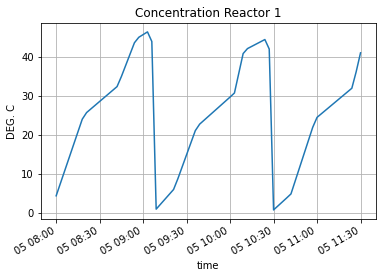

In [27]:
tag = 'BA:CONC.1'
df[tag].plot(grid=True, title=desc[tag]).set_ylabel(units[tag])